In [14]:
import numpy as np
import pandas as pd
pd.options.io.excel.xlsx.writer = 'xlsxwriter'

dataset = pd.read_csv(r'./datas/数字化差异性分析数据.csv', index_col=None, header=0, dtype={'股票代码':'object'})
js_dataset = dataset[dataset['上市省份']=='江苏']
print(js_dataset[js_dataset['digital']==1].shape[0])  # 只有236个数据是1，但是我们不提的话或许可以提高准确率。
# js_dataset.reset_index(inplace=True, drop=True)
# 删除不需要的数据
js_dataset = js_dataset.drop(['上市省份'], axis=1)
js_dataset

650


,股票代码,截止日期,企业年限,行业类别,权益乘数,速动比率,资本积累率B,固定资产增长率B,营业总收入增长率,销售费用增长率,...,股权性质,两权分离度(%),股权集中度4(%),独董比例,提供岗位增长率,员工收入增长率,研发强度,创新产出,董事会规模,digital
314,000301,2007,7.0,13.0,1.380405,0.668586,-0.006589,-0.273977,0.006221,0.041691,...,1,0.000000,40.2903,0.333333,0.263699,0.166207,2.003051,0.000000,2.302585,0
315,000301,2008,8.0,13.0,1.546510,0.492229,0.082254,-0.350255,-0.463183,-0.710069,...,1,0.000000,41.2454,0.333333,-0.394657,0.166207,2.003051,0.000000,2.302585,0
316,000301,2009,9.0,13.0,1.561810,0.724658,0.006033,-0.143850,-0.085466,0.813145,...,1,0.000000,43.7998,0.400000,0.069272,0.166207,2.003051,0.000000,2.397895,0
317,000301,2010,10.0,60.0,1.470518,1.270975,0.025920,-0.096754,0.233287,-0.668786,...,1,0.000000,41.7098,0.571429,0.028239,0.166207,2.003051,0.000000,2.079442,0
318,000301,2011,11.0,60.0,1.360832,1.019489,0.005543,-0.170452,0.170210,2.126254,...,1,0.000000,39.9150,0.384615,0.009693,0.166207,2.003051,0.000000,2.639057,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26718,870436,2022,1.0,32.0,1.778334,1.436806,-0.097942,-0.056501,-0.382923,-0.163350,...,0,16.988600,76.5233,0.333333,-0.030721,-0.114466,2.284421,4.234107,2.302585,0
26719,871396,2021,1.0,36.0,1.485790,2.525995,0.087010,-0.105547,-0.020185,-0.168257,...,0,5.108174,63.0868,0.250000,0.263699,0.166207,1.619388,2.708050,2.302585,1
26720,871396,2022,2.0,36.0,1.476032,2.110647,0.056330,0.182788,-0.087836,-0.070228,...,0,5.108174,63.0972,0.250000,0.010714,-0.048795,1.733424,3.496508,2.302585,1
26723,871642,2021,0.0,25.0,1.362160,1.854867,0.512965,0.379445,0.104335,0.105209,...,0,0.440000,71.3047,0.428571,0.263699,0.166207,2.512846,2.397895,2.079442,0


In [19]:
from sklearn.model_selection import train_test_split
from utils import  normalize

head = ['股票代码','截止日期']
Xnames=['企业年限', '行业类别', '权益乘数', '速动比率', '资本积累率B', '固定资产增长率B', '营业总收入增长率', '销售费用增长率', '管理费用增长率', '现金资产比率', '全部现金回收率', '净利润现金净含量', '营运指数', '资本支出与折旧摊销比', '营业净利率', '销售期间费用率', '投入资本回报率（ROIC）', '成本费用利润率', '应付账款周转率B', '存货周转率B', '应收账款周转率B', '经营杠杆', '财务杠杆', '两职合一', '本期销售额占年度销售总额比例(%)', '本期采购额占年度采购总额比例(%)', '股权性质', '两权分离度(%)', '股权集中度4(%)', '独董比例', '提供岗位增长率', '员工收入增长率', '研发强度', '创新产出', '董事会规模']
Ynames=['digital']
headset = js_dataset[head]
# 对数据进行标准化，数据量有点大，可以尝试单纯拿出江苏省数据先进行分析
# 思路A:是不是可以进一步对全国数据通过行业筛选研究？
X = normalize(js_dataset[Xnames], method='m')
X = pd.DataFrame(X,columns=Xnames)
y = js_dataset[Ynames].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

对于比较复杂的数据，一般需要使用较为丰富的网络结构，以避免过拟合，由于网络结构的多样性，对于分类数据，可采用以下思路迭代寻求最优模型。
先设计一个足够丰富的网络结构（已经过拟合），然后通过“早停”或“权重衰减”进行正则化处理。

In [3]:
from sklearn.metrics import mean_squared_error # 均方误差
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(500, 500), random_state=123, max_iter=10000)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model.n_iter_

0.8433734939759037


166

In [4]:
# 以上模型可能已经过拟合，尝试使用“早停”方法 
model = MLPClassifier(hidden_layer_sizes=(500, 500), random_state=123, early_stopping=True, validation_fraction=0.25, max_iter=10000)
# 注释：early_stopping开启“早停”方法；validation_fraction随机选取25%的训练集作为测试集，而不作为训练数据，在算法迭代时，同时计算验证集的预测准确率，当验证集的准确率不在上升时，算法将停止
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model.n_iter_
# 可见准确率上升，迭代次数下降。

0.8493975903614458


36

In [5]:
# “权重衰减”进行正则化
model = MLPClassifier(hidden_layer_sizes=(500, 500), random_state=123, alpha=0.1, max_iter=10000)
# 参数alpha=0.1表示，将L2惩罚项参数设置为0.1（类似于岭回归）
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(f'迭代次数{model.n_iter_}')
# 权重衰减也能使得准确率提高，但一般会增加迭代次数，进一步，可以选择交叉验证或验证集法寻找最优的惩罚项参数alpha，这一般比较费时

0.8418674698795181
迭代次数186


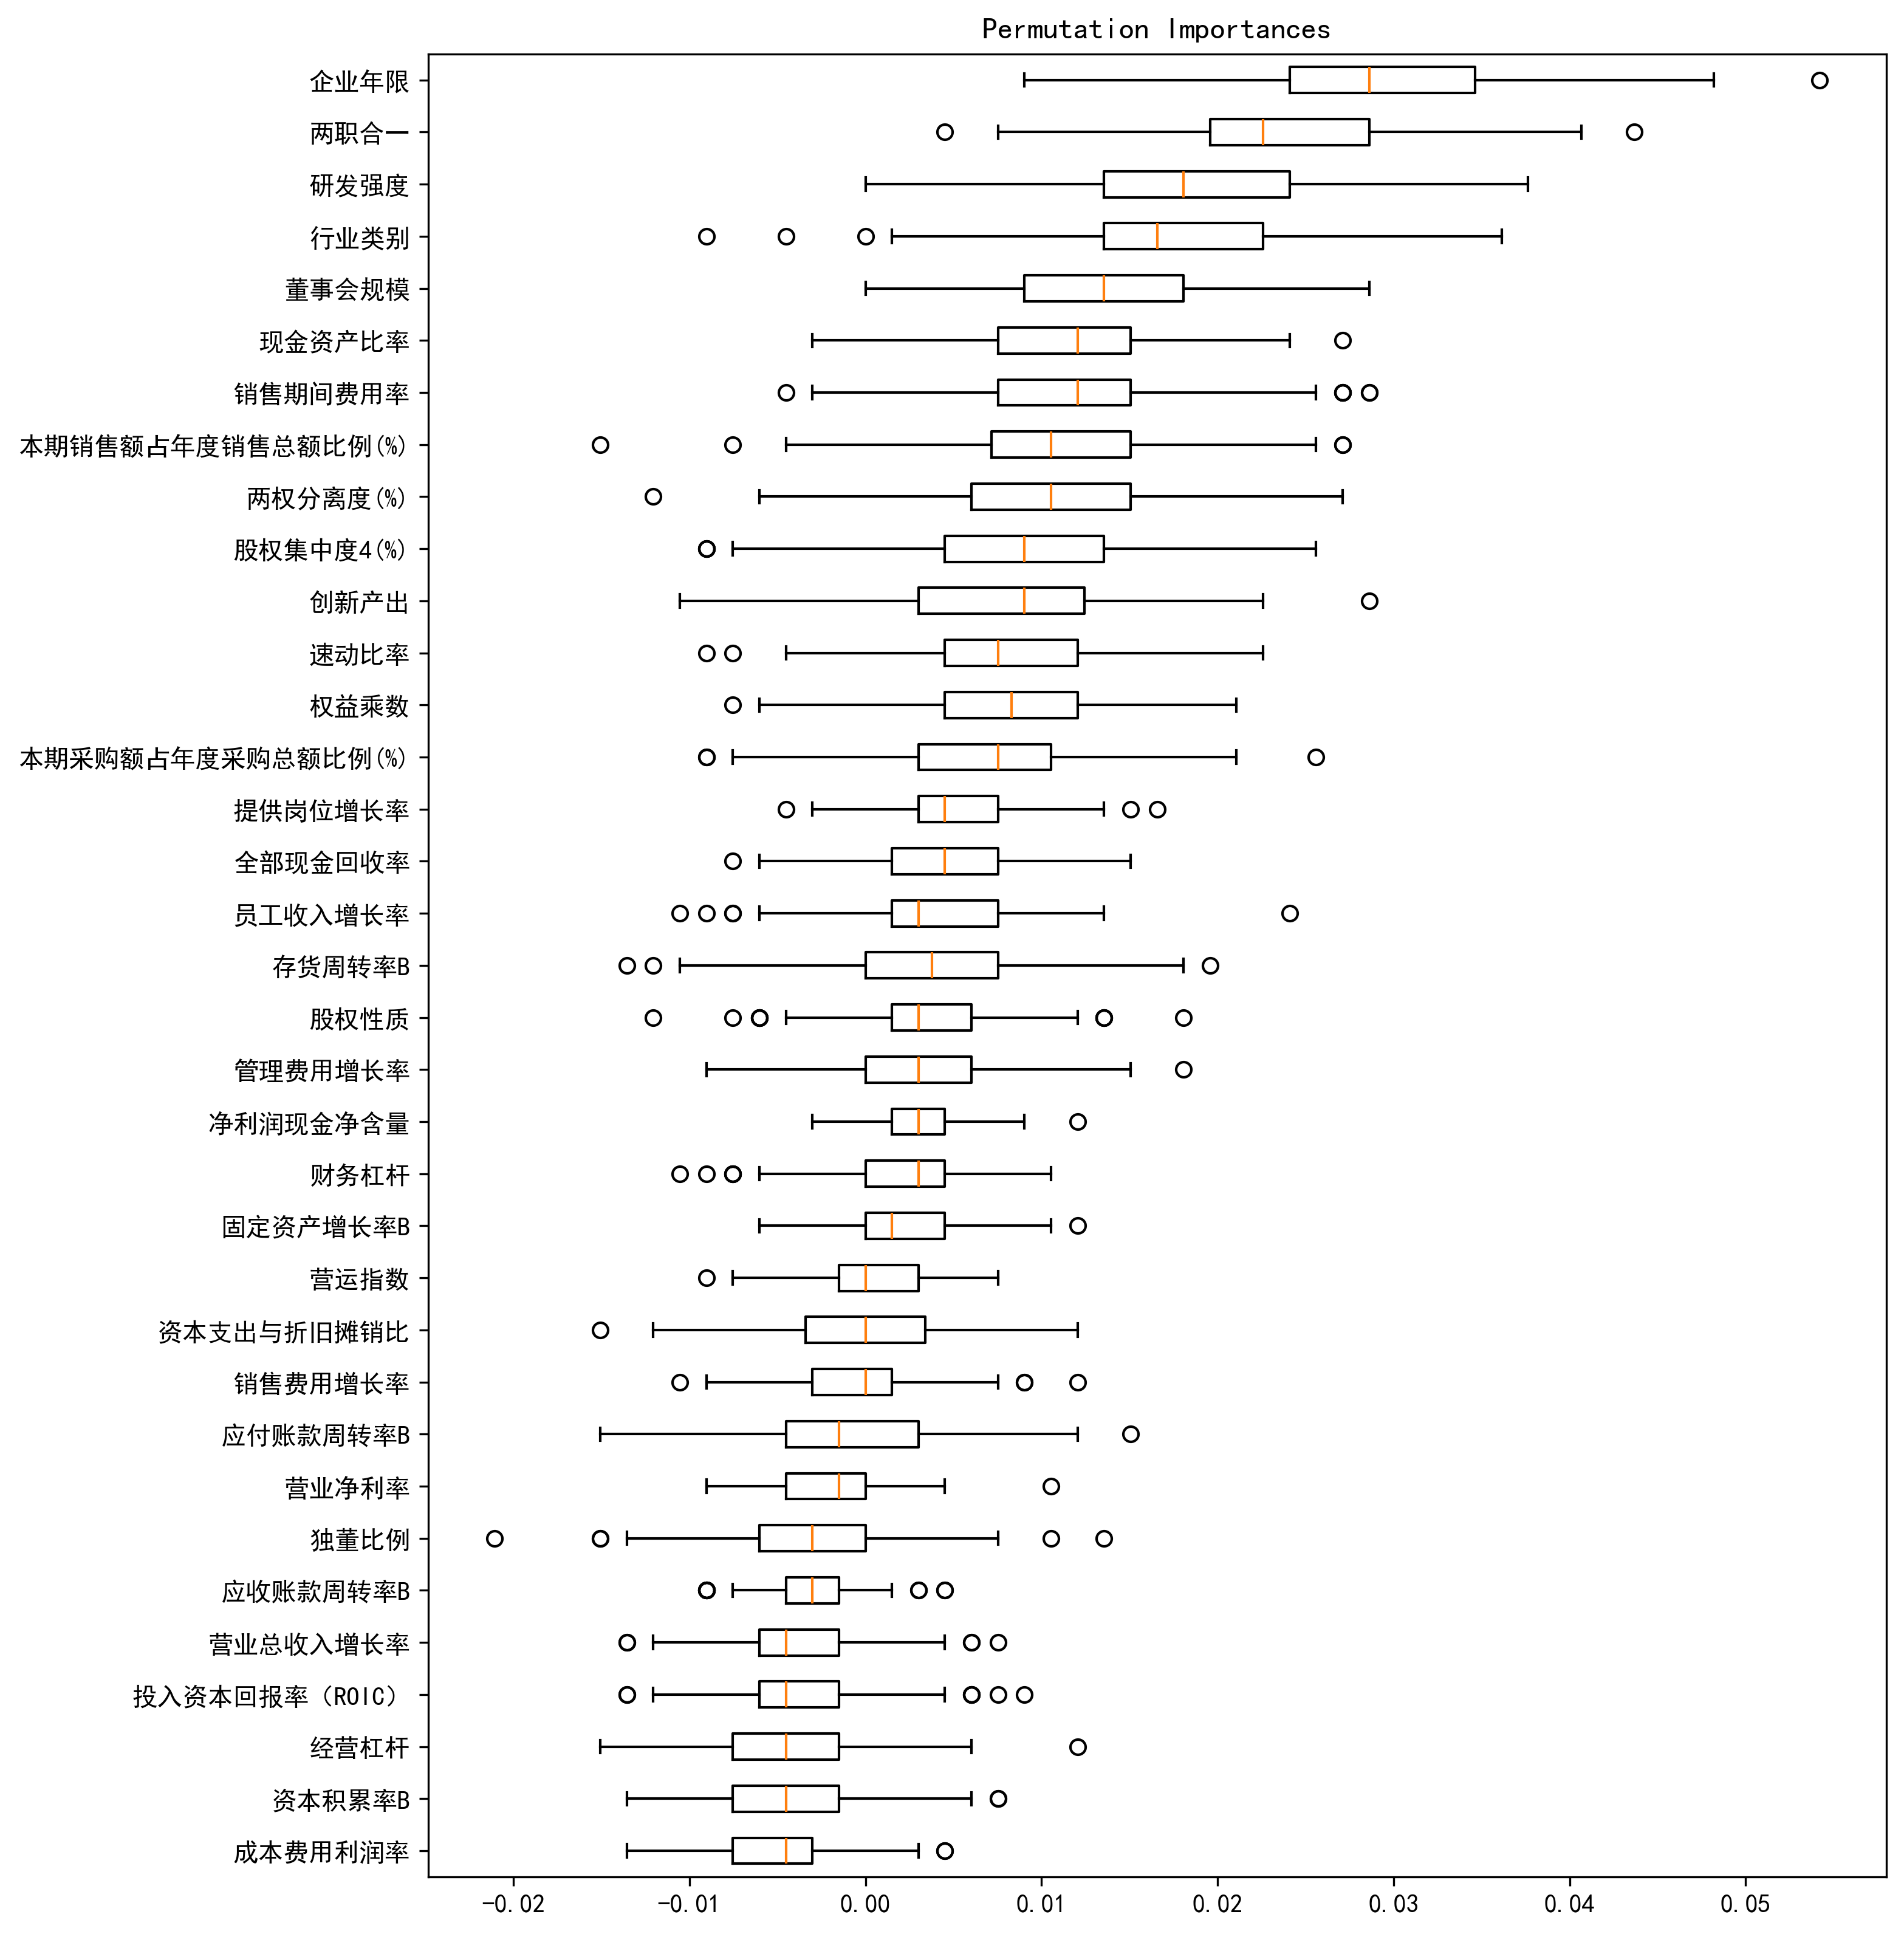

In [10]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

Bunch_result = permutation_importance(model, X_test, y_test, n_repeats=200, random_state=42)
# n_repeats=20：进行50次随机替换
# Bunch_result:[importance(置换重要度),importance_mean（置换重要度均值）,importance_std（置换重要度标准差）]

Bunch_index = Bunch_result.importances_mean.argsort()
nlabels = [Xnames[i] for i in Bunch_index]

fig = plt.figure(figsize=(8,10),dpi=300)
ax = fig.add_axes([0,0,1,1])

# Bunch_index = Bunch_result.importances_mean.argsort()
ax.boxplot(Bunch_result.importances[Bunch_index].T, vert=False,labels=nlabels)  #  labels=Xnames
plt.title('Permutation Importances')
plt.show()

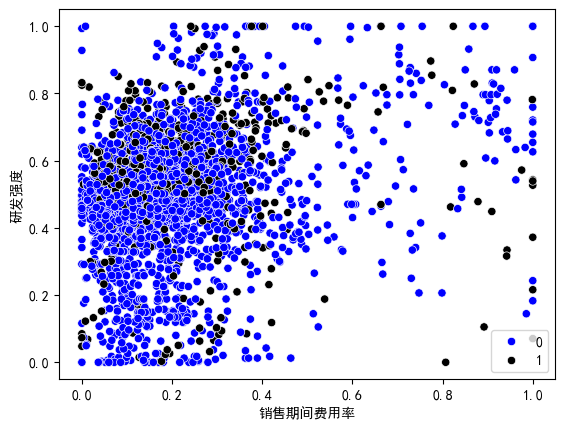

In [32]:
import seaborn as sns

# 绘制决策边界只能有两个变量，我们选取最重要的两个变量吧
X = normalize(js_dataset[Xnames], method='m')
X = pd.DataFrame(X, columns=Xnames)
y = js_dataset[Ynames].values.ravel()

x1, x2='销售期间费用率', '研发强度'

X2 = X[[x1, x2]]
sns.scatterplot(x=x1, y=x2, data=X2, hue=y, palette=['blue','black'])

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.1, random_state=1)

C:\Envs\digital\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Envs\digital\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Envs\digital\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Envs\digital\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


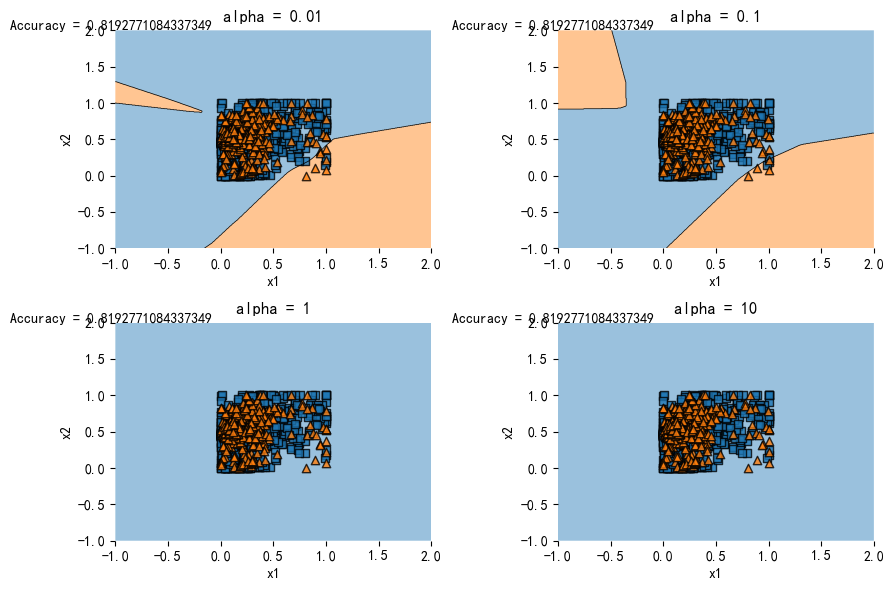

In [33]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(9, 6))
for i, alpha in enumerate([0.01, 0.1, 1, 10]):
    model = MLPClassifier(hidden_layer_sizes=(500, 500), alpha=alpha, random_state=123, max_iter=10000)
    model.fit(X2, y)
    plt.subplot(2, 2, i + 1)
    accuracy = model.score(X_test, y_test)
    plot_decision_regions(np.array(X2), np.array(y), model, legend=0)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'alpha = {alpha}')
    plt.text(-2, 2, f'Accuracy = {accuracy}')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.tight_layout()

In [31]:
prob = model.predict_proba(X_test)
# 测试集样例的分类概率（第一列为是非数字化转型企业的概率，第二列为数字化转型企业概率）
pred = model.predict(X_test)
# 预测测试集样例的分类结果
pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
# 计算测试集混淆矩阵

Predicted,0
Actual,
0,550
1,114
